# <div style="text-align: center; background-color:#60ced6; font-family:Impact; color: black; padding: 20px; line-height: 1;border-radius:20px">Heart Disease Prediction</div>

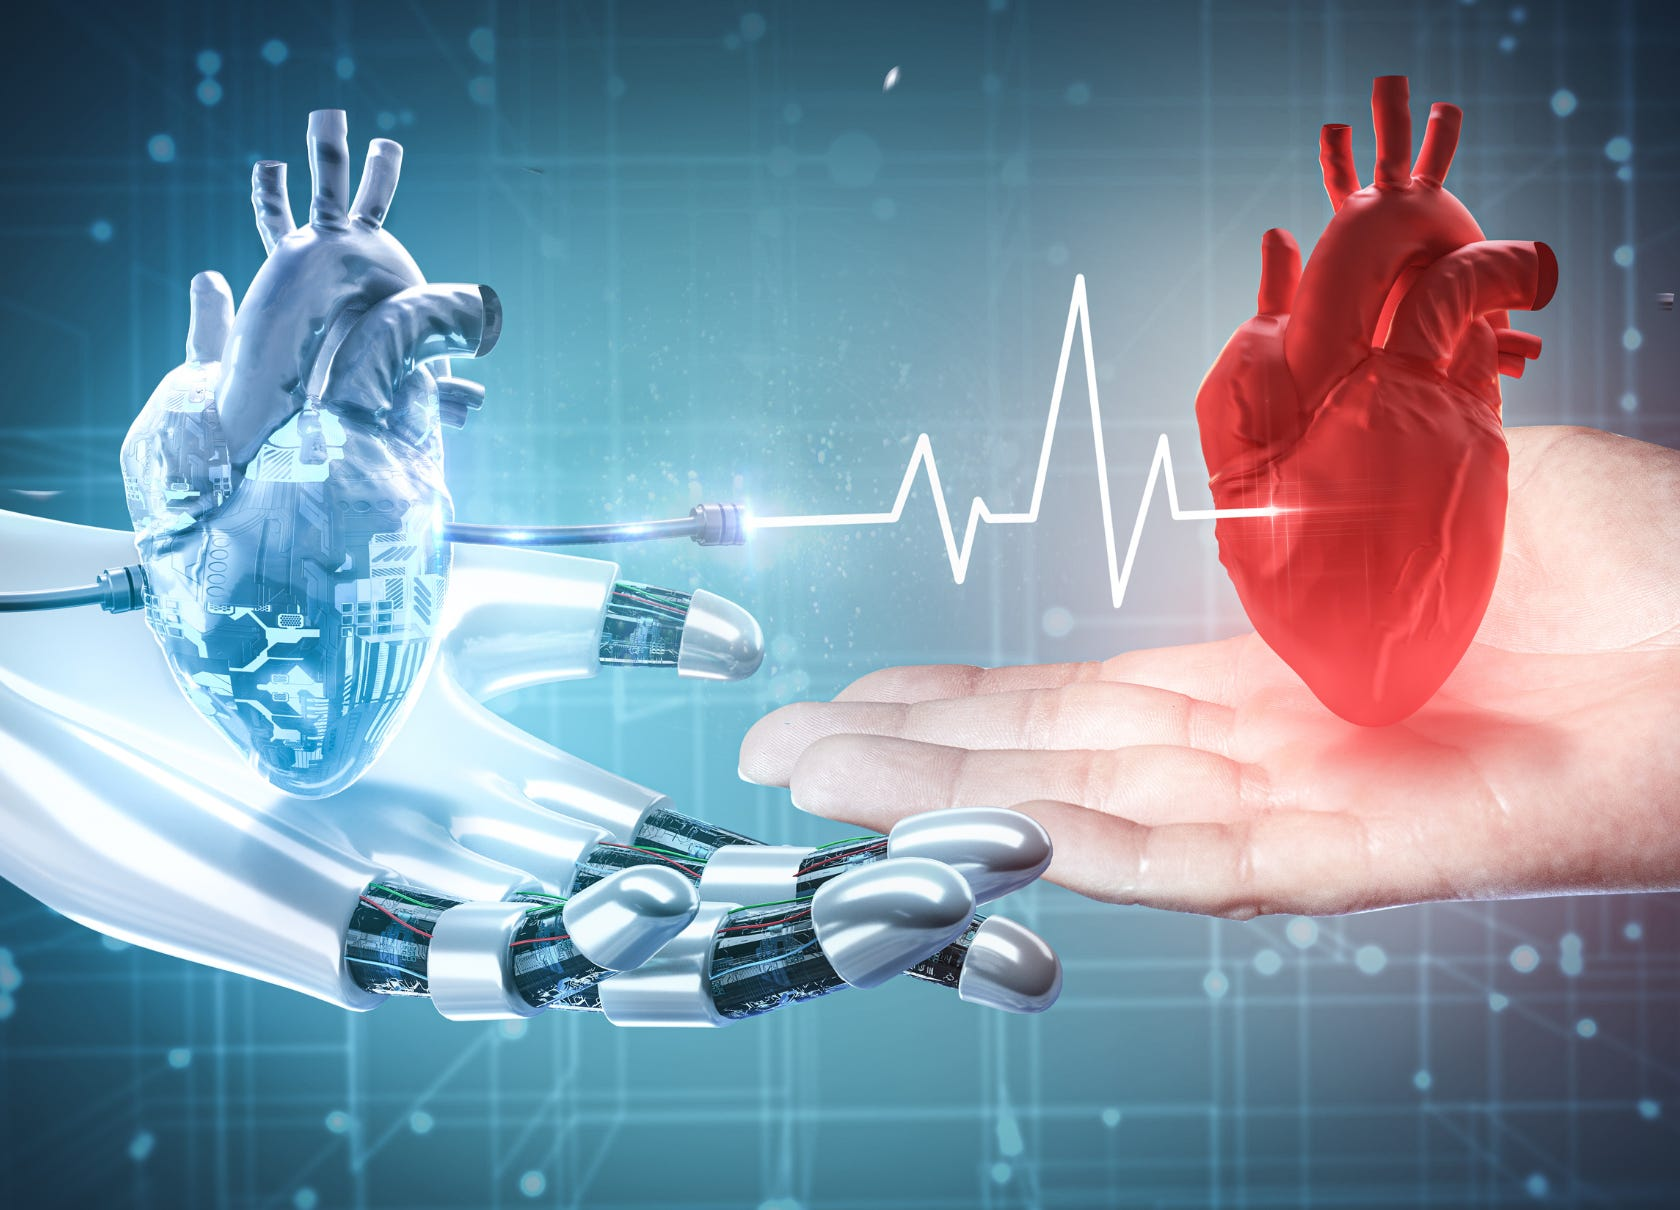

# Import Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data Loading

In [ ]:
data=pd.read_csv('/kaggle/input/heart-disease-dataset/heart_statlog_cleveland_hungary_final.csv')

In [ ]:
data

# About Dataset
* This heart disease dataset is curated by combining 5 popular heart disease datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes.
* The five datasets used for its curation are:
    *   Cleveland
    *   Hungarian
    *   Switzerland
    *   Long Beach VA


> Statlog (Heart) Data Set.
This dataset consists of 1190 instances with 11 features. These datasets were collected and combined at one place to help advance research on CAD-related machine learning and data mining algorithms, and hopefully to ultimately advance clinical diagnosis and early treatment.

In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
data.isnull().sum()

Cleaned data : No null values

In [ ]:
# checking unique values
for i in data.columns:
    print(i,':',data[i].nunique())

# **Exploratory Data Analysis**

In [ ]:
sns.pairplot(data)

In [ ]:
data.columns

In [ ]:
sns.histplot(x='age',data=data,discrete=True)
plt.title('Age Distribution')
plt.show()

In [ ]:
data['chest pain type'].value_counts().plot(kind='pie',shadow=True,explode=(0,0,0,0.1))
plt.legend(labels=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'], loc='best')
plt.title('Distribution of chest pain type')
plt.show()

In [ ]:
sns.histplot(x='resting bp s',data=data)
plt.title('resting bp s')
plt.show()

In [ ]:
plt.hist(data['cholesterol'],)

# Add labels and title
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.title('Distribution of Cholesterol')

# Display the plot
plt.show()

In [ ]:
data.columns

In [ ]:
target_counts = data['target'].value_counts()

# Create a bar plot
target_counts.plot.bar()

# Add labels and title
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Value Counts of Target')

# Display the plot
plt.show()

In [ ]:
data['resting ecg'].value_counts().plot(kind='pie',shadow=True,explode=(0,0,0.1))
plt.legend(labels=['Normal', 'Having st-t wave abnormality', 'Showing probable or definite left ventricular hypertrophy by Estes'], loc='best')
plt.title('Distribution of resting ecg type')
plt.show()

# **Import Libraries for model building**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
x=data.drop('target',axis=1)

In [ ]:
y=data['target']

In [ ]:
# Spliting dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train

In [ ]:
# Building Model
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

In [ ]:
y_pred=rfc.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)

In [ ]:
accuracy

In [ ]:
print("Classification Report:")
print(report)